<a href="https://colab.research.google.com/github/Aagam1005/Machine-Learning/blob/main/Sales_Forecasting_for_Retail_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.3 MB/s eta 0:00:00
🚀 Sales Forecasting for Retail Business
📊 Generating synthetic retail sales data...
✅ Generated 730 days of sales data
📈 Sales range: $681.08 - $4088.26

🔍 Performing Exploratory Data Analysis...
📊 Basic Statistics:
   • Mean daily sales: $1932.41
   • Median daily sales: $1891.42
   • Standard deviation: $562.10
   • Min sales: $681.08
   • Max sales: $4088.26


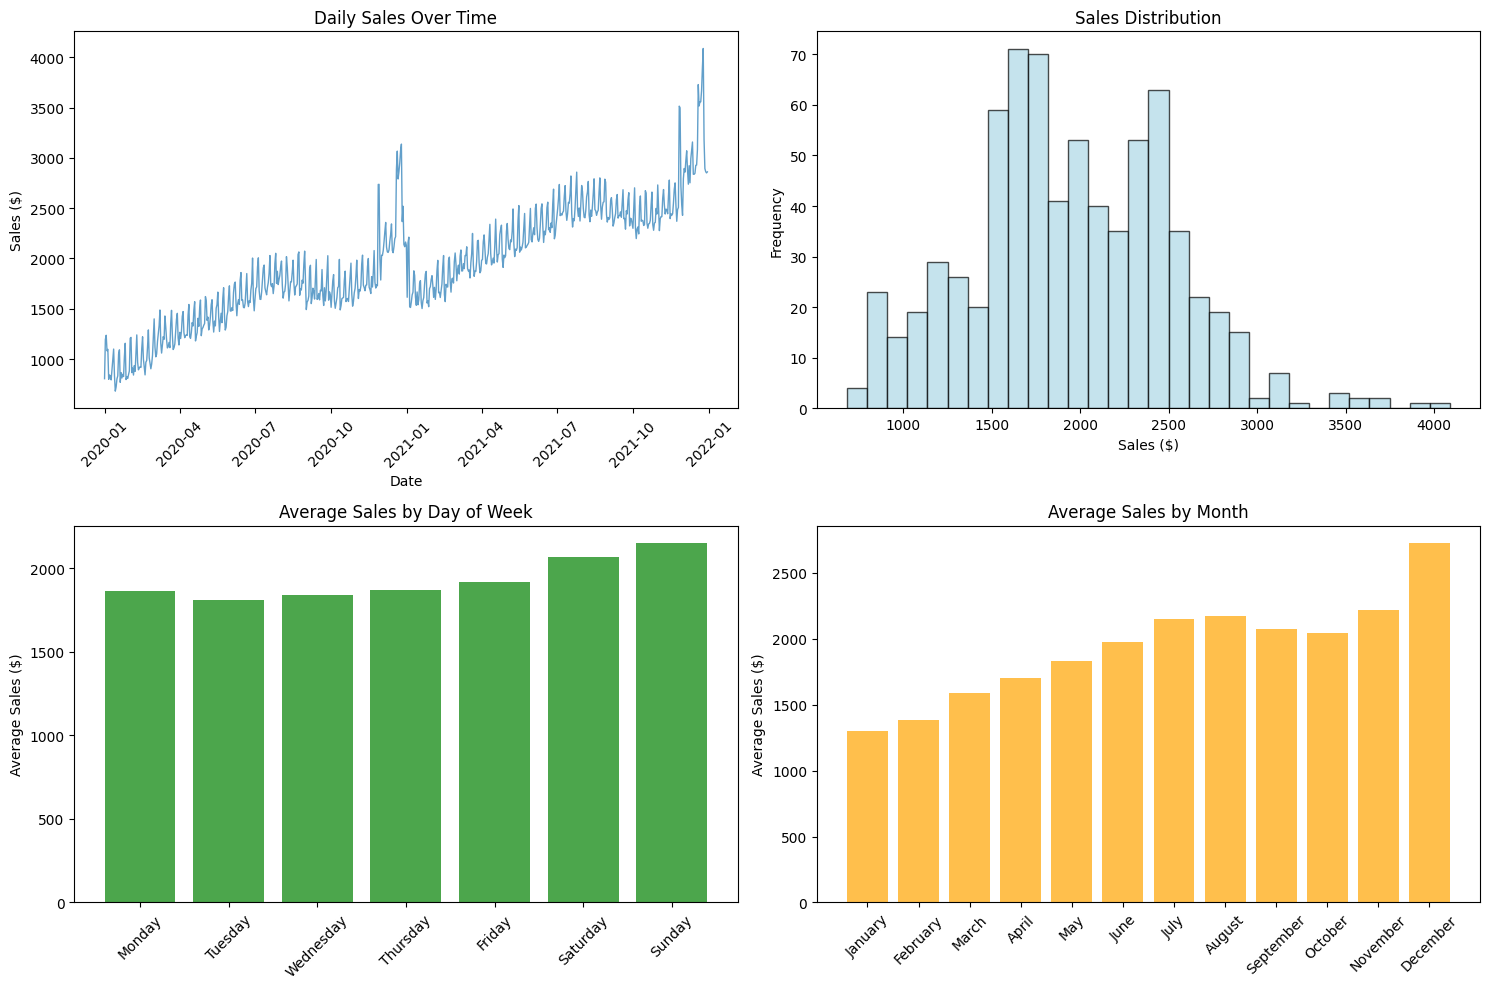

📊 Key Insights:
   • Highest sales day: Sunday ($2149.31)
   • Lowest sales day: Tuesday ($1812.75)
   • Best month: December ($2723.30)
   • Worst month: January ($1300.53)

🔧 Engineering additional features...
✅ Added 20 additional features

🤖 Training Forecasting Models...
📊 Training set: 560 samples
📊 Test set: 141 samples

🔮 Training Prophet Model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_c74ml_h/6h4a2owh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_c74ml_h/qxxqdnkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92051', 'data', 'file=/tmp/tmp_c74ml_h/6h4a2owh.json', 'init=/tmp/tmp_c74ml_h/qxxqdnkx.json', 'output', 'file=/tmp/tmp_c74ml_h/prophet_modela574tv6_/prophet_model-20250608184819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:48:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:48:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Prophet Model Performance:
   • MAE: $135.58
   • RMSE: $193.27
   • MAPE: 11.64%

🌲 Training Random Forest Model...
✅ Random Forest Model Performance:
   • MAE: $145.47
   • RMSE: $263.33
   • MAPE: 4.91%

🎯 Top 10 Most Important Features:
   lag_7: 0.4944
   rolling_mean_7: 0.2666
   lag_28: 0.0746
   lag_14: 0.0626
   lag_1: 0.0587
   day_of_week: 0.0083
   rolling_std_30: 0.0051
   rolling_std_7: 0.0050
   rolling_mean_14: 0.0050
   rolling_mean_30: 0.0041

📊 Comparing Model Performance...


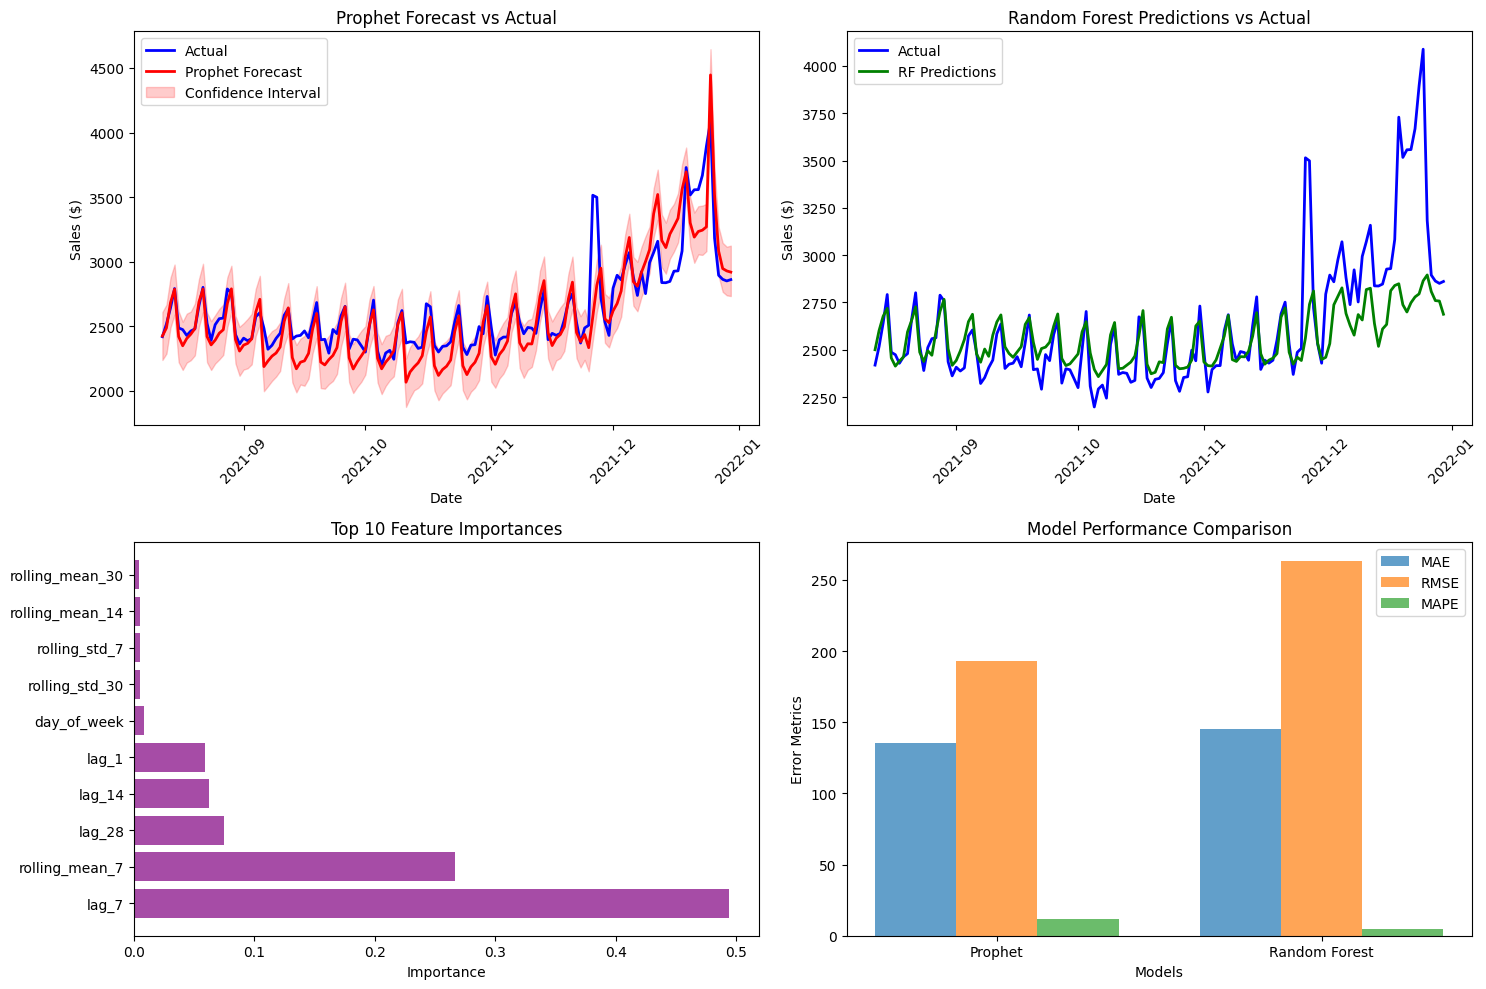


🏆 Model Comparison Summary:
Model           MAE        RMSE       MAPE      
--------------------------------------------------
Prophet         135.58     193.27     11.64     %
Random Forest   145.47     263.33     4.91      %

🥇 Best Model: Random Forest (lowest MAPE)

🔮 Generating Future Forecasts (Next 90 Days)...
✅ Generated 90 days of future forecasts
📈 Forecasted sales range: $1929.76 - $3094.74
📊 Average daily forecast: $2425.49
📈 Expected 30-day growth rate: -25.27%

📊 Creating Comprehensive Forecast Visualization...


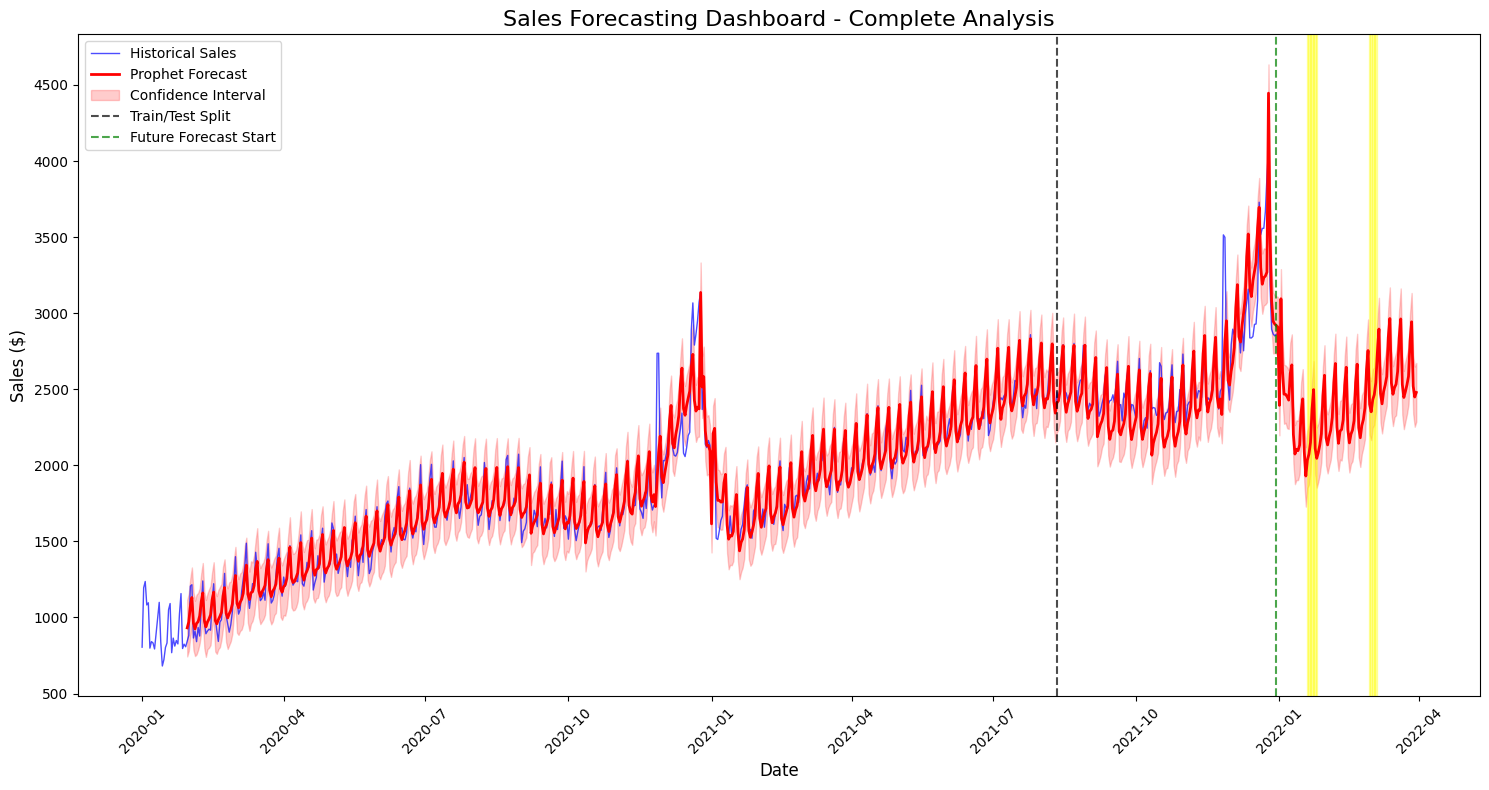


💡 Business Insights and Recommendations:
📅 SEASONAL PATTERNS:
   • Peak sales month: December ($2723.30 avg)
   • Lowest sales month: January ($1300.53 avg)
   • Best performing day: Sunday ($2149.31 avg)

📈 GROWTH PROJECTIONS:
   • Next 90 days total forecast: $218,294.09
   • Last 90 days actual: $243,360.65
   • Projected growth: -10.30%

🎯 TOP 5 FORECASTED SALES DAYS:
   • 2022-01-02: $3094.74
   • 2022-03-13: $2964.85
   • 2022-03-20: $2962.18
   • 2022-03-27: $2943.23
   • 2021-12-31: $2908.89

🎉 PROMOTIONAL IMPACT:
   • Average sales on promo days: $2289.60
   • Average sales on non-promo days: $2446.40
   • Promotional lift: -6.41%

🎯 STRATEGIC RECOMMENDATIONS:
   1. Focus marketing efforts in December to maximize peak season
   2. Plan promotional campaigns for January to boost low-season sales
   3. Optimize staffing and inventory for Sundays
   4. Implement promotional campaigns to boost sales
   5. Monitor forecast accuracy and retrain model monthly

📊 MODEL PERFORMANCE SU

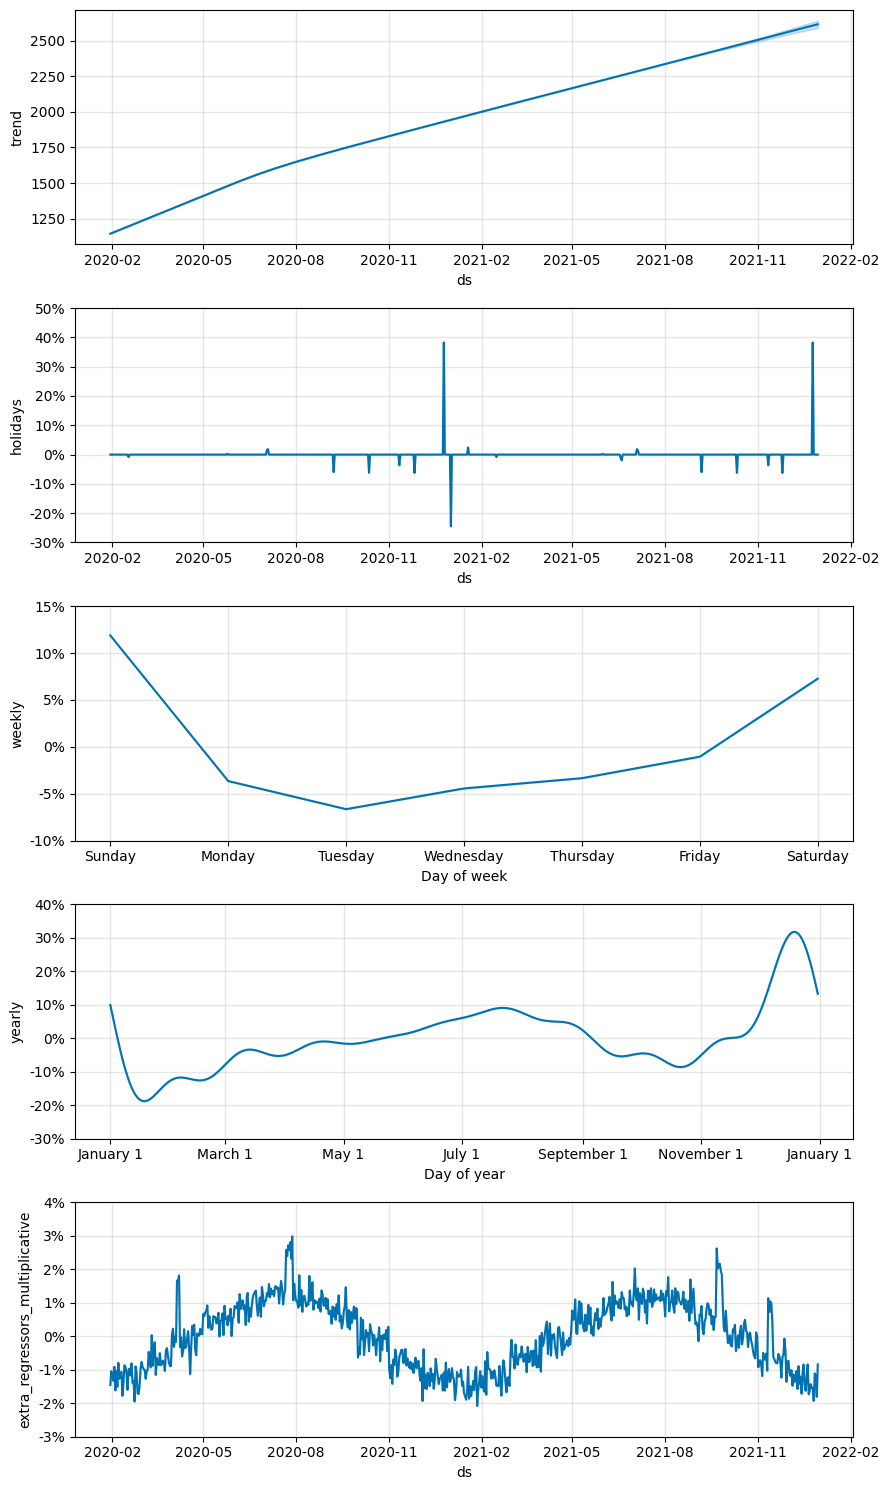

In [ ]:
# Sales Forecasting for Retail Business - Google Colab Version (Fixed)
# Install required packages
!pip install prophet plotly kaleido scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

print("🚀 Sales Forecasting for Retail Business")
print("=" * 50)

# ============================================================================
# DATA GENERATION
# ============================================================================

def generate_retail_sales_data(start_date='2020-01-01', periods=730):
    """
    Generate synthetic retail sales data with realistic patterns
    """
    print("📊 Generating synthetic retail sales data...")

    # Create date range
    dates = pd.date_range(start=start_date, periods=periods)

    # Base trend (increasing over time)
    base_sales = np.linspace(1000, 2500, periods)

    # Weekly pattern (weekends have higher sales)
    day_of_week_effect = np.array([0, -50, -20, 0, 50, 200, 300])
    weekly_pattern = np.array([day_of_week_effect[d.dayofweek] for d in dates])

    # Monthly seasonality (higher in summer and December)
    month_effect = np.array([-200, -150, 0, 50, 100, 200, 300, 250, 100, 0, 50, 400])
    monthly_pattern = np.array([month_effect[d.month-1] for d in dates])

    # Special events/holidays
    holidays = {}
    # Black Friday effect
    for year in range(2020, 2023):
        black_friday = pd.Timestamp(f"{year}-11-25") + pd.Timedelta(days=(4-pd.Timestamp(f"{year}-11-25").dayofweek) % 7)
        holidays[black_friday] = 1000
        holidays[black_friday + pd.Timedelta(days=1)] = 800

        # Christmas shopping
        for i in range(1, 8):
            holidays[pd.Timestamp(f"{year}-12-{18+i}")] = 500 + i * 70

        # New Year sales
        holidays[pd.Timestamp(f"{year}-01-02")] = 400
        holidays[pd.Timestamp(f"{year}-01-03")] = 350

    # Apply holiday effects
    holiday_effect = np.zeros(periods)
    for i, date in enumerate(dates):
        if date in holidays:
            holiday_effect[i] = holidays[date]

    # Random noise
    noise = np.random.normal(0, 50, periods)

    # Combine all components
    sales = base_sales + weekly_pattern + monthly_pattern + holiday_effect + noise

    # Ensure no negative sales
    sales = np.maximum(sales, 100)

    # Create DataFrame
    df = pd.DataFrame({
        'ds': dates,
        'y': sales
    })

    return df

# Generate the data
sales_data = generate_retail_sales_data()
print(f"✅ Generated {len(sales_data)} days of sales data")
print(f"📈 Sales range: ${sales_data['y'].min():.2f} - ${sales_data['y'].max():.2f}")

# ============================================================================
# EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n🔍 Performing Exploratory Data Analysis...")

# Basic statistics
print(f"📊 Basic Statistics:")
print(f"   • Mean daily sales: ${sales_data['y'].mean():.2f}")
print(f"   • Median daily sales: ${sales_data['y'].median():.2f}")
print(f"   • Standard deviation: ${sales_data['y'].std():.2f}")
print(f"   • Min sales: ${sales_data['y'].min():.2f}")
print(f"   • Max sales: ${sales_data['y'].max():.2f}")

# Create analysis using matplotlib (more stable than Plotly for this case)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Time series plot
axes[0, 0].plot(sales_data['ds'], sales_data['y'], linewidth=1, alpha=0.7)
axes[0, 0].set_title('Daily Sales Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Sales ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Sales distribution
axes[0, 1].hist(sales_data['y'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 1].set_title('Sales Distribution')
axes[0, 1].set_xlabel('Sales ($)')
axes[0, 1].set_ylabel('Frequency')

# 3. Day of week analysis
sales_data['day_of_week'] = sales_data['ds'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sales_by_day = sales_data.groupby('day_of_week')['y'].mean().reindex(day_order)

axes[1, 0].bar(avg_sales_by_day.index, avg_sales_by_day.values, color='green', alpha=0.7)
axes[1, 0].set_title('Average Sales by Day of Week')
axes[1, 0].set_ylabel('Average Sales ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Monthly analysis
sales_data['month'] = sales_data['ds'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
avg_sales_by_month = sales_data.groupby('month')['y'].mean().reindex(month_order)

axes[1, 1].bar(avg_sales_by_month.index, avg_sales_by_month.values, color='orange', alpha=0.7)
axes[1, 1].set_title('Average Sales by Month')
axes[1, 1].set_ylabel('Average Sales ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print key insights
print(f"📊 Key Insights:")
print(f"   • Highest sales day: {avg_sales_by_day.idxmax()} (${avg_sales_by_day.max():.2f})")
print(f"   • Lowest sales day: {avg_sales_by_day.idxmin()} (${avg_sales_by_day.min():.2f})")
print(f"   • Best month: {avg_sales_by_month.idxmax()} (${avg_sales_by_month.max():.2f})")
print(f"   • Worst month: {avg_sales_by_month.idxmin()} (${avg_sales_by_month.min():.2f})")

# ============================================================================
# FEATURE ENGINEERING
# ============================================================================

def add_features(df):
    """Add additional features for advanced modeling"""
    print("\n🔧 Engineering additional features...")

    df = df.copy()

    # Date features
    df['year'] = df['ds'].dt.year
    df['month'] = df['ds'].dt.month
    df['day_of_month'] = df['ds'].dt.day
    df['day_of_week'] = df['ds'].dt.dayofweek
    df['quarter'] = df['ds'].dt.quarter
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    df['is_month_start'] = df['ds'].dt.is_month_start.astype(int)
    df['is_month_end'] = df['ds'].dt.is_month_end.astype(int)

    # Lag features
    for lag in [1, 7, 14, 28]:
        df[f'lag_{lag}'] = df['y'].shift(lag)

    # Rolling window statistics
    for window in [7, 14, 30]:
        df[f'rolling_mean_{window}'] = df['y'].rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df['y'].rolling(window=window).std()

    # Promotional periods (simulated)
    df['promotion'] = 0
    for year in range(2020, 2023):
        # Random promotional periods
        for month in range(1, 13):
            if np.random.random() < 0.2:  # 20% chance each month
                start_day = np.random.randint(1, 25)
                try:
                    promo_start = pd.Timestamp(f"{year}-{month:02d}-{start_day:02d}")
                    promo_length = np.random.randint(3, 8)
                    for i in range(promo_length):
                        promo_date = promo_start + pd.Timedelta(days=i)
                        if promo_date in df['ds'].values:
                            df.loc[df['ds'] == promo_date, 'promotion'] = 1
                except:
                    continue

    # Weather effect (simulated temperature)
    base_temp = np.array([5, 7, 12, 18, 23, 28, 31, 29, 24, 18, 11, 6])
    df['temperature'] = df['ds'].apply(
        lambda x: base_temp[x.month-1] + np.random.normal(0, 3)
    )

    # Drop NaN values
    df = df.dropna()

    return df

# Add features
enhanced_data = add_features(sales_data)
print(f"✅ Added {len(enhanced_data.columns) - 2} additional features")

# ============================================================================
# MODEL TRAINING AND EVALUATION
# ============================================================================

print("\n🤖 Training Forecasting Models...")

# Split data
train_size = int(len(enhanced_data) * 0.8)
train_data = enhanced_data[:train_size]
test_data = enhanced_data[train_size:]

print(f"📊 Training set: {len(train_data)} samples")
print(f"📊 Test set: {len(test_data)} samples")

# ============================================================================
# PROPHET MODEL
# ============================================================================

print("\n🔮 Training Prophet Model...")

# Prepare data for Prophet
prophet_train = train_data[['ds', 'y', 'promotion', 'temperature']].copy()
prophet_test = test_data[['ds', 'y', 'promotion', 'temperature']].copy()

# Initialize Prophet model
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05,
    interval_width=0.95
)

# Add country holidays
prophet_model.add_country_holidays(country_name='US')

# Add external regressors
prophet_model.add_regressor('promotion')
prophet_model.add_regressor('temperature')

# Fit the model
prophet_model.fit(prophet_train)

# Make predictions
future = prophet_model.make_future_dataframe(periods=len(prophet_test))
future['promotion'] = pd.concat([prophet_train['promotion'], prophet_test['promotion']]).values
future['temperature'] = pd.concat([prophet_train['temperature'], prophet_test['temperature']]).values

prophet_forecast = prophet_model.predict(future)

# Evaluate Prophet model
prophet_test_forecast = prophet_forecast.tail(len(prophet_test))
prophet_mae = mean_absolute_error(prophet_test['y'], prophet_test_forecast['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(prophet_test['y'], prophet_test_forecast['yhat']))
prophet_mape = np.mean(np.abs((prophet_test['y'] - prophet_test_forecast['yhat']) / prophet_test['y'])) * 100

print(f"✅ Prophet Model Performance:")
print(f"   • MAE: ${prophet_mae:.2f}")
print(f"   • RMSE: ${prophet_rmse:.2f}")
print(f"   • MAPE: {prophet_mape:.2f}%")

# ============================================================================
# RANDOM FOREST MODEL
# ============================================================================

print("\n🌲 Training Random Forest Model...")

# Prepare features
feature_cols = [col for col in enhanced_data.columns if col not in ['ds', 'y']]
X_train = train_data[feature_cols]
y_train = train_data['y']
X_test = test_data[feature_cols]
y_test = test_data['y']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mape = np.mean(np.abs((y_test - rf_predictions) / y_test)) * 100

print(f"✅ Random Forest Model Performance:")
print(f"   • MAE: ${rf_mae:.2f}")
print(f"   • RMSE: ${rf_rmse:.2f}")
print(f"   • MAPE: {rf_mape:.2f}%")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🎯 Top 10 Most Important Features:")
for i, row in feature_importance.head(10).iterrows():
    print(f"   {row['Feature']}: {row['Importance']:.4f}")

# ============================================================================
# MODEL COMPARISON AND VISUALIZATION
# ============================================================================

print("\n📊 Comparing Model Performance...")

# Create comparison plots using matplotlib
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Prophet forecast plot
axes[0, 0].plot(prophet_test['ds'], prophet_test['y'], label='Actual', color='blue', linewidth=2)
axes[0, 0].plot(prophet_test['ds'], prophet_test_forecast['yhat'], label='Prophet Forecast', color='red', linewidth=2)
axes[0, 0].fill_between(prophet_test['ds'],
                       prophet_test_forecast['yhat_lower'],
                       prophet_test_forecast['yhat_upper'],
                       color='red', alpha=0.2, label='Confidence Interval')
axes[0, 0].set_title('Prophet Forecast vs Actual')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Sales ($)')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Random Forest predictions plot
axes[0, 1].plot(test_data['ds'], y_test, label='Actual', color='blue', linewidth=2)
axes[0, 1].plot(test_data['ds'], rf_predictions, label='RF Predictions', color='green', linewidth=2)
axes[0, 1].set_title('Random Forest Predictions vs Actual')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Sales ($)')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Feature importance plot
top_features = feature_importance.head(10)
axes[1, 0].barh(top_features['Feature'], top_features['Importance'], color='purple', alpha=0.7)
axes[1, 0].set_title('Top 10 Feature Importances')
axes[1, 0].set_xlabel('Importance')

# Model comparison
models = ['Prophet', 'Random Forest']
mae_scores = [prophet_mae, rf_mae]
rmse_scores = [prophet_rmse, rf_rmse]
mape_scores = [prophet_mape, rf_mape]

x = np.arange(len(models))
width = 0.25

axes[1, 1].bar(x - width, mae_scores, width, label='MAE', alpha=0.7)
axes[1, 1].bar(x, rmse_scores, width, label='RMSE', alpha=0.7)
axes[1, 1].bar(x + width, mape_scores, width, label='MAPE', alpha=0.7)

axes[1, 1].set_title('Model Performance Comparison')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('Error Metrics')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print model comparison
print(f"\n🏆 Model Comparison Summary:")
print(f"{'Model':<15} {'MAE':<10} {'RMSE':<10} {'MAPE':<10}")
print("-" * 50)
print(f"{'Prophet':<15} {prophet_mae:<10.2f} {prophet_rmse:<10.2f} {prophet_mape:<10.2f}%")
print(f"{'Random Forest':<15} {rf_mae:<10.2f} {rf_rmse:<10.2f} {rf_mape:<10.2f}%")

# Determine best model
best_model = "Prophet" if prophet_mape < rf_mape else "Random Forest"
print(f"\n🥇 Best Model: {best_model} (lowest MAPE)")

# ============================================================================
# FUTURE FORECASTING
# ============================================================================

print(f"\n🔮 Generating Future Forecasts (Next 90 Days)...")

# Create future forecast with Prophet
future_periods = 90
future_extended = prophet_model.make_future_dataframe(periods=len(prophet_test) + future_periods)

# Add regressor values for future dates
existing_data = pd.concat([prophet_train, prophet_test])
future_extended['promotion'] = 0
future_extended['temperature'] = 0

# Fill existing values
for idx, row in existing_data.iterrows():
    mask = future_extended['ds'] == row['ds']
    if mask.any():
        future_extended.loc[mask, 'promotion'] = row['promotion']
        future_extended.loc[mask, 'temperature'] = row['temperature']

# Simulate future values
last_date = existing_data['ds'].max()
future_dates_mask = future_extended['ds'] > last_date

# Simulate future promotions (assume 2 promotional periods in next 90 days)
promo_start_days = [20, 60]  # Days after last_date
promo_durations = [7, 5]     # Duration of each promotion

for start_day, duration in zip(promo_start_days, promo_durations):
    promo_start = last_date + pd.Timedelta(days=start_day)
    for i in range(duration):
        promo_date = promo_start + pd.Timedelta(days=i)
        if promo_date in future_extended['ds'].values:
            future_extended.loc[future_extended['ds'] == promo_date, 'promotion'] = 1

# Simulate future temperatures (seasonal pattern)
base_temp = np.array([5, 7, 12, 18, 23, 28, 31, 29, 24, 18, 11, 6])
future_dates = future_extended[future_dates_mask]

for idx in future_dates.index:
    month = future_extended.loc[idx, 'ds'].month
    temp = base_temp[month-1] + np.random.normal(0, 3)
    future_extended.loc[idx, 'temperature'] = temp

# Make future predictions
future_forecast = prophet_model.predict(future_extended)

# Extract future predictions
future_predictions = future_forecast[future_forecast['ds'] > last_date]

print(f"✅ Generated {len(future_predictions)} days of future forecasts")
print(f"📈 Forecasted sales range: ${future_predictions['yhat'].min():.2f} - ${future_predictions['yhat'].max():.2f}")
print(f"📊 Average daily forecast: ${future_predictions['yhat'].mean():.2f}")

# Calculate growth projections
last_30_days_actual = existing_data.tail(30)['y'].mean()
next_30_days_forecast = future_predictions.head(30)['yhat'].mean()
growth_rate = (next_30_days_forecast / last_30_days_actual - 1) * 100

print(f"📈 Expected 30-day growth rate: {growth_rate:.2f}%")

# ============================================================================
# COMPREHENSIVE FORECAST VISUALIZATION
# ============================================================================

print(f"\n📊 Creating Comprehensive Forecast Visualization...")

# Create the main forecast plot using matplotlib
plt.figure(figsize=(15, 8))

# Historical data
plt.plot(sales_data['ds'], sales_data['y'], label='Historical Sales', color='blue', linewidth=1, alpha=0.7)

# Prophet forecast
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Prophet Forecast', color='red', linewidth=2)

# Confidence intervals
plt.fill_between(future_forecast['ds'],
                future_forecast['yhat_lower'],
                future_forecast['yhat_upper'],
                color='red', alpha=0.2, label='Confidence Interval')

# Add vertical lines for important dates
train_test_split = train_data['ds'].iloc[-1]
forecast_start = test_data['ds'].iloc[-1]

plt.axvline(x=train_test_split, color='black', linestyle='--', alpha=0.7, label='Train/Test Split')
plt.axvline(x=forecast_start, color='green', linestyle='--', alpha=0.7, label='Future Forecast Start')

# Highlight promotional periods in forecast
promo_dates = future_extended[future_extended['promotion'] == 1]['ds']
for date in promo_dates:
    if date > forecast_start:  # Only highlight future promotions
        plt.axvspan(date - pd.Timedelta(hours=12), date + pd.Timedelta(hours=12),
                   color='yellow', alpha=0.3)

plt.title('Sales Forecasting Dashboard - Complete Analysis', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# BUSINESS INSIGHTS AND RECOMMENDATIONS
# ============================================================================

print(f"\n💡 Business Insights and Recommendations:")
print("=" * 60)

# Seasonal insights
best_month = avg_sales_by_month.idxmax()
worst_month = avg_sales_by_month.idxmin()
best_day = avg_sales_by_day.idxmax()

print(f"📅 SEASONAL PATTERNS:")
print(f"   • Peak sales month: {best_month} (${avg_sales_by_month.max():.2f} avg)")
print(f"   • Lowest sales month: {worst_month} (${avg_sales_by_month.min():.2f} avg)")
print(f"   • Best performing day: {best_day} (${avg_sales_by_day.max():.2f} avg)")

# Growth projections
total_forecast_90d = future_predictions['yhat'].sum()
total_historical_90d = sales_data.tail(90)['y'].sum()
total_growth = (total_forecast_90d / total_historical_90d - 1) * 100

print(f"\n📈 GROWTH PROJECTIONS:")
print(f"   • Next 90 days total forecast: ${total_forecast_90d:,.2f}")
print(f"   • Last 90 days actual: ${total_historical_90d:,.2f}")
print(f"   • Projected growth: {total_growth:.2f}%")

# Peak sales days in forecast
top_forecast_days = future_predictions.nlargest(5, 'yhat')[['ds', 'yhat']]
print(f"\n🎯 TOP 5 FORECASTED SALES DAYS:")
for idx, row in top_forecast_days.iterrows():
    print(f"   • {row['ds'].strftime('%Y-%m-%d')}: ${row['yhat']:.2f}")

# Promotional impact analysis
future_extended_subset = future_extended.tail(len(future_predictions))
promo_days = future_predictions[future_extended_subset['promotion'] == 1]
non_promo_days = future_predictions[future_extended_subset['promotion'] == 0]

if len(promo_days) > 0 and len(non_promo_days) > 0:
    promo_avg = promo_days['yhat'].mean()
    non_promo_avg = non_promo_days['yhat'].mean()
    promo_lift = (promo_avg / non_promo_avg - 1) * 100

    print(f"\n🎉 PROMOTIONAL IMPACT:")
    print(f"   • Average sales on promo days: ${promo_avg:.2f}")
    print(f"   • Average sales on non-promo days: ${non_promo_avg:.2f}")
    print(f"   • Promotional lift: {promo_lift:.2f}%")
else:
    promo_lift = 0
    print(f"\n🎉 PROMOTIONAL IMPACT:")
    print(f"   • No promotional periods in forecast for analysis")

# Recommendations
print(f"\n🎯 STRATEGIC RECOMMENDATIONS:")
print(f"   1. Focus marketing efforts in {best_month} to maximize peak season")
print(f"   2. Plan promotional campaigns for {worst_month} to boost low-season sales")
print(f"   3. Optimize staffing and inventory for {best_day}s")
if promo_lift > 0:
    print(f"   4. Consider increasing promotional frequency (current lift: {promo_lift:.1f}%)")
else:
    print(f"   4. Implement promotional campaigns to boost sales")
print(f"   5. Monitor forecast accuracy and retrain model monthly")

# Model performance summary
print(f"\n📊 MODEL PERFORMANCE SUMMARY:")
print(f"   • Best performing model: {best_model}")
print(f"   • Forecast accuracy (MAPE): {min(prophet_mape, rf_mape):.2f}%")
print(f"   • Confidence interval: 95%")
print(f"   • Forecast horizon: 90 days")

print(f"\n✅ Sales Forecasting Analysis Complete!")
print(f"🎉 Ready for business decision making!")

# Display Prophet components
print(f"\n📊 Displaying Prophet Model Components...")
fig = prophet_model.plot_components(prophet_forecast)
plt.show()